In [6]:
import pandas as pd
import numpy as np

In [138]:
df= pd.read_csv('C:/Users/rgangurde/Downloads/Data/creditcard.csv')

In [41]:
xFeature= df.drop('Time', axis= 1)
xFeature.head()
xFeature= df.drop('Class', axis= 1)

In [42]:
Y= np.asanyarray(df['Class'])
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
X= np.asanyarray(xFeature[:])

In [44]:
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 6)

In [46]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(C= 0.001, solver= 'liblinear')
model.fit(X_train, Y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
yHat= model.predict(X_test)
yHat_Prob= model.predict_proba(X_test)

In [52]:
from sklearn import metrics

print('ROC:', metrics.average_precision_score(Y_test, yHat_Prob[:,1]))

ROC: 0.4888606874035093


# The accuracy is too low. Trying another approach. Using Clustering 

In [147]:
#X_= df.drop('Class', axis= 1)
X_= np.asanyarray(df)

X_[:,0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.72788e+05,
       1.72788e+05, 1.72792e+05])

In [148]:
Y_= np.asanyarray(df['Class'])

In [70]:
x_train, x_test, y_train, y_test= train_test_split(X_, Y_, test_size= 0.2, random_state= 5)

In [149]:
from sklearn.cluster import KMeans
model_= KMeans(init= 'k-means++', n_clusters= 4, n_init= 10)
model_.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [150]:
labels= model_.labels_
labels

array([2, 2, 2, ..., 1, 1, 1])

In [151]:
df['ClusterLabel']= labels

In [139]:
df= pd.DataFrame(df.astype('float'))
type(df)

pandas.core.frame.DataFrame

In [140]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


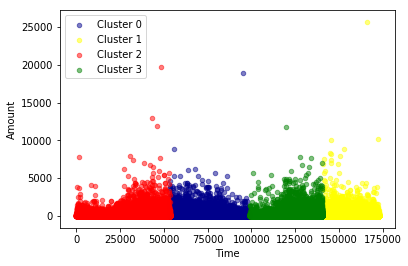

In [157]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.get_backend()
# plt.plot(kind= 'scatter',x= X_[:,0], y= X_[:,29], c= labels.astype(np.float))
cl_0= pd.DataFrame(df[df['ClusterLabel'] == 0])
cl_0.head()

cl_1 = pd.DataFrame(df[df['ClusterLabel'] == 1])
cl_1.head()

cl_2= pd.DataFrame(df[df['ClusterLabel'] == 2])
cl_2.head()

cl_3 = pd.DataFrame(df[df['ClusterLabel'] == 3])
cl_3.head()

ax = cl_0[:].plot(kind= 'scatter',x= 'Time', y= 'Amount', color= 'DarkBlue', label = 'Cluster 0', alpha = 0.5);
cl_1[:].plot(kind= 'scatter',x= 'Time', y= 'Amount', color= 'Yellow', label = 'Cluster 1', ax= ax,  alpha = 0.5);
cl_2[:].plot(kind= 'scatter',x= 'Time', y= 'Amount', color= 'Red', label = 'Cluster 2', ax= ax,  alpha = 0.5);
cl_3[:].plot(kind= 'scatter',x= 'Time', y= 'Amount', color= 'Green', label = 'Cluster 3', ax= ax,  alpha = 0.5)

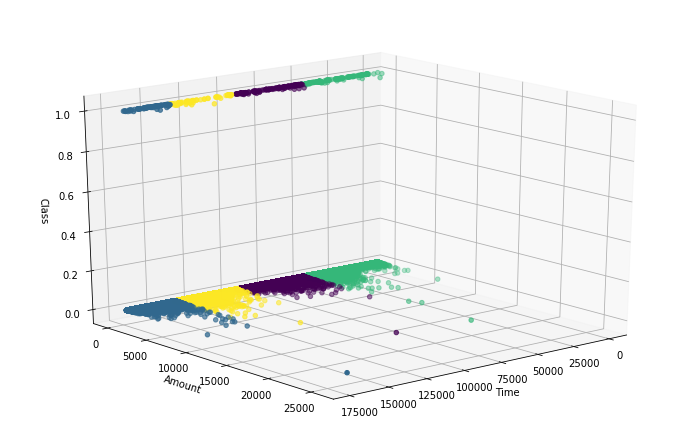

In [160]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize= (10,6))
plt.clf()
ax = Axes3D( fig, rect = [0,0, 0.95, 1], elev= 20, azim = 50)

plt.cla()
ax.set_xlabel('Time')
ax.set_ylabel('Amount')
ax.set_zlabel('Class')

ax.scatter(X_[:, 0], X_[:, 29], X_[:, 30],  c= labels.astype(np.float))

# Model with k= 2

In [162]:
model2_= KMeans(init= 'k-means++', n_clusters= 2, n_init= 10)
model2_.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [163]:
df['ClusterLabel']= model2_.labels_

In [164]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ClusterLabel
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1


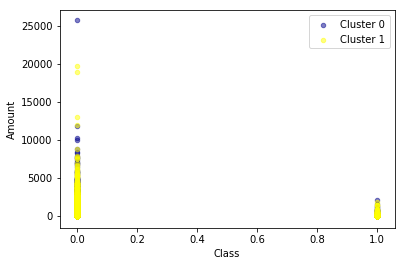

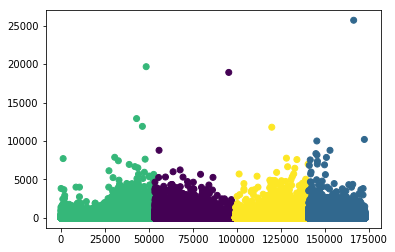

In [175]:
cl_0= pd.DataFrame(df[df['ClusterLabel'] == 0])
cl_0.head()

cl_1 = pd.DataFrame(df[df['ClusterLabel'] == 1])
cl_1.head()

ax = cl_0[:].plot(kind= 'scatter',x= 'Class', y= 'Amount', color= 'DarkBlue', label = 'Cluster 0', alpha = 0.5);
cl_1[:].plot(kind= 'scatter',x= 'Class', y= 'Amount', color= 'Yellow', label = 'Cluster 1', ax= ax,  alpha = 0.5);
plt.show()
plt.scatter(X_[:,0], X_[:,29], c= labels.astype(np.float))

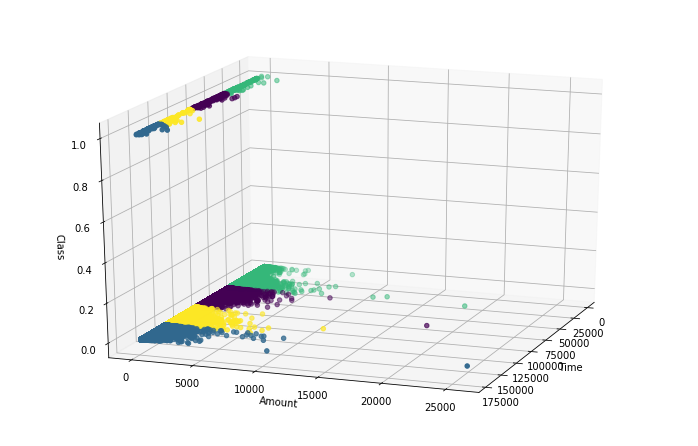

In [173]:
fig = plt.figure(1, figsize= (10,6))
plt.clf()
ax = Axes3D( fig, rect = [0,0, 0.95, 1], elev= 20, azim = 20)

plt.cla()
ax.set_xlabel('Time')
ax.set_ylabel('Amount')
ax.set_zlabel('Class')

ax.scatter(X_[:, 0], X_[:, 29], X_[:, 30],  c= labels.astype(np.float))

In [174]:
cl_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ClusterLabel
153163,98067.0,2.049515,0.237030,-1.593518,0.737361,0.178089,-1.404303,0.097469,-0.390186,2.035138,...,0.487392,0.006195,-0.191956,0.182372,-0.132008,-0.033105,-0.040332,4.99,0.0,0
153164,98077.0,-0.067098,1.380322,-1.056131,-0.481265,1.982795,-0.822121,1.443016,-0.432069,0.754162,...,0.146839,-0.504629,0.018258,0.796422,0.333448,0.197513,0.076996,2.24,0.0,0
153165,98079.0,2.124883,0.078972,-2.250837,-0.030834,0.878061,-0.859462,0.468090,-0.360841,1.446647,...,0.266680,-0.038785,0.310880,0.408288,0.175858,-0.131196,-0.094741,5.53,0.0,0
153166,98086.0,1.905060,-0.380851,-0.326036,0.581057,-0.652199,-0.659278,-0.526961,-0.198289,2.680916,...,0.609164,0.071124,-0.168666,-0.089087,-0.598944,0.021923,-0.031251,58.90,0.0,0
153167,98087.0,-0.906800,1.738039,-0.766675,-0.498597,0.323520,-0.732318,0.411514,0.316675,1.560760,...,1.084825,-0.070113,-0.453360,-0.666410,-0.233959,0.665843,0.418226,0.89,0.0,0
